### **Atividade Prática 2 do Curso: Statistics for Data Science and Business Analysis (Udemy)**

**Conteúdos abordados nessa seção:**<br>
    - Estatística inferencial;<br>
    - Distribuição T-Student;<br>
    - Intervalos de confiança.

* Para os cáculos dos intervalos de confiança foram utilizadas as bibliotecas Scipy e Pongouin.

* **Importando as bibliotecas**

In [1]:
# Bibliotecas básicas
import numpy as np
import pandas as pd

# Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

## Configurações de Visualização
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.3)

* **Importando o dataset**

In [2]:
path = 'datasets/Confidence_intervals_lesson.xlsx'
df = pd.read_excel(path, parse_dates= True, index_col= 'Date')

df.head()

,InvoiceNo,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
Date,,,,,,,,,,,
2014-01-01 01:06:24,52389,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,159.0
2014-01-01 03:44:48,52390,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,159.2
2014-01-01 09:01:36,52391,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,119.2
2014-01-01 09:16:00,52392,United States,2234,US6,Female,9.5,40,7.5,159,0.0,159.0
2014-01-01 13:35:12,52393,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,159.0


In [3]:
# First we will drop the columns that doesn't have the contribution for the analisys
cols__to_drop = ['InvoiceNo', 'ProductID', 'Size (Europe)', 'Size (UK)']
df.drop(columns= cols__to_drop, inplace= True)

df.head()

,Country,Shop,Gender,Size (US),UnitPrice,Discount,SalePrice
Date,,,,,,,
2014-01-01 01:06:24,United Kingdom,UK2,Male,11.0,159,0.0,159.0
2014-01-01 03:44:48,United States,US15,Male,11.5,199,0.2,159.2
2014-01-01 09:01:36,Canada,CAN7,Male,9.5,149,0.2,119.2
2014-01-01 09:16:00,United States,US6,Female,9.5,159,0.0,159.0
2014-01-01 13:35:12,United Kingdom,UK4,Female,9.0,159,0.0,159.0


In [4]:
# Create a month columns
df['Month'] = df.index.month
df.head()

,Country,Shop,Gender,Size (US),UnitPrice,Discount,SalePrice,Month
Date,,,,,,,,
2014-01-01 01:06:24,United Kingdom,UK2,Male,11.0,159,0.0,159.0,1
2014-01-01 03:44:48,United States,US15,Male,11.5,199,0.2,159.2,1
2014-01-01 09:01:36,Canada,CAN7,Male,9.5,149,0.2,119.2,1
2014-01-01 09:16:00,United States,US6,Female,9.5,159,0.0,159.0,1
2014-01-01 13:35:12,United Kingdom,UK4,Female,9.0,159,0.0,159.0,1


* Task 1: Calculate the confidence intervals for men and female shoes sales in the USA, this time based on a bigger sample - 2015-2016. 

In [5]:
# Split the data into male and female, year 2015-2016 and United States Country
df_male = df[(df['Gender'] == 'Male') & (df.index.year >= 2015) & (df['Country'] == 'United States')]
df_female = df[(df['Gender'] == 'Female') & (df.index.year >= 2015) & (df['Country'] == 'United States')]

print(f'Male dataset size: {len(df_male)}.')
print(f'Female dataset size: {len(df_female)}.')

Male dataset size: 2770.
Female dataset size: 2089.


In [6]:
# Calculate the size male shoes frequency per month (2015-2016)
freq_male = pd.DataFrame(df_male[['Country','Size (US)', 'Month']].groupby('Size (US)').value_counts())
freq_male = freq_male.pivot_table(
    index = ['Size (US)'],
    columns = ['Month'],
    values = 0
)

freq_male.fillna(0, inplace= True)
#freq_male['Mean'] = freq_male.mean(axis= 1).round(2)
freq_male

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
6.0,4.0,1.0,3.0,1.0,6.0,4.0,4.0,7.0,8.0,11.0,3.0,0.0
6.5,7.0,3.0,0.0,2.0,0.0,0.0,3.0,10.0,2.0,2.0,5.0,4.0
7.0,0.0,0.0,1.0,0.0,7.0,6.0,5.0,2.0,4.0,2.0,2.0,3.0
7.5,3.0,3.0,5.0,2.0,7.0,0.0,10.0,5.0,7.0,8.0,3.0,3.0
8.0,12.0,12.0,8.0,3.0,18.0,8.0,13.0,4.0,12.0,11.0,5.0,9.0
8.5,16.0,17.0,11.0,9.0,17.0,20.0,23.0,23.0,10.0,21.0,14.0,8.0
9.0,27.0,27.0,20.0,20.0,38.0,38.0,45.0,51.0,39.0,42.0,23.0,22.0
9.5,37.0,41.0,50.0,39.0,42.0,49.0,44.0,73.0,56.0,61.0,72.0,50.0
10.0,25.0,39.0,39.0,34.0,23.0,51.0,47.0,42.0,45.0,46.0,26.0,34.0


In [7]:
# Calculate the size female shoes frequency per month (2015-2016)
freq_female = pd.DataFrame(df_female[['Country','Size (US)', 'Month']].groupby('Size (US)').value_counts())
freq_female = freq_female.pivot_table(
    index = ['Size (US)'],
    columns = ['Month'],
    values = 0
)

freq_female.fillna(0, inplace= True)
freq_female

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
4.5,0.0,3.0,2.0,0.0,1.0,6.0,0.0,1.0,1.0,0.0,0.0,2.0
5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0
5.5,5.0,2.0,0.0,3.0,0.0,3.0,4.0,1.0,1.0,0.0,6.0,11.0
6.0,0.0,5.0,3.0,11.0,4.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0
6.5,14.0,13.0,12.0,1.0,8.0,16.0,18.0,2.0,0.0,2.0,3.0,0.0
7.0,11.0,5.0,5.0,8.0,9.0,20.0,11.0,9.0,8.0,11.0,6.0,6.0
7.5,14.0,23.0,25.0,31.0,26.0,39.0,24.0,20.0,24.0,27.0,18.0,7.0
8.0,28.0,54.0,30.0,30.0,53.0,35.0,52.0,50.0,50.0,51.0,40.0,36.0
8.5,9.0,6.0,16.0,18.0,42.0,38.0,55.0,33.0,38.0,35.0,22.0,28.0


- Problem: What is the number of shoes that are likely to be sold, based on historical data? <br>
 Obs: With 95% of confidence interval.

In [8]:
# Population Variance unknown -> T-statistic
import scipy.stats as st

#create 95% confidence interval for sample mean weight (male)

lower_interval = []
higher_interval = []
for i in range(len(freq_male)):
    row = freq_male.iloc[i]
    t_test = st.t.interval(alpha=0.95, df=len(row)-1, loc=np.mean(row), scale=st.sem(row))
    lower_interval.append(t_test[0])
    higher_interval.append(t_test[1])
    
    
t_test_male = pd.DataFrame({'lower_interval': lower_interval, 'higher_interval': higher_interval})
t_test_male['Mean'] = freq_male.mean(axis= 1).round(2).values
t_test_male['Size US'] = freq_male.index
t_test_male

,lower_interval,higher_interval,Mean,Size US
0,2.299910,6.366757,4.33,6.0
1,1.254150,5.079183,3.17,6.5
2,1.150146,4.183188,2.67,7.0
3,2.842544,6.490789,4.67,7.5
4,6.854425,12.312242,9.58,8.0
5,12.332454,19.167546,15.75,8.5
6,25.853984,39.479350,32.67,9.0
7,43.442602,58.890731,51.17,9.5
8,31.682081,43.484586,37.58,10.0
9,25.552725,34.280609,29.92,10.5


In [9]:
#create 95% confidence interval for sample mean weight (female)

lower_interval = []
higher_interval = []
for i in range(len(freq_male)):
    row = freq_female.iloc[i]
    t_test = st.t.interval(alpha=0.95, df=len(row)-1, loc=np.mean(row), scale=st.sem(row))
    lower_interval.append(t_test[0])
    higher_interval.append(t_test[1])
    
    
t_test_female = pd.DataFrame({'lower_interval': lower_interval, 'higher_interval': higher_interval})
t_test_female['Mean'] = freq_female.mean(axis= 1).round(2).values
t_test_female['Size US'] = freq_female.index
t_test_female

,lower_interval,higher_interval,Mean,Size US
0,0.205393,2.461274,1.33,4.5
1,-0.115419,1.448753,0.67,5.0
2,0.954580,5.045420,3.00,5.5
3,0.363039,4.470294,2.42,6.0
4,3.086494,11.746839,7.42,6.5
5,6.478271,11.688396,9.08,7.0
6,18.020327,28.313007,23.17,7.5
7,35.934546,48.898787,42.42,8.0
8,19.100742,37.565924,28.33,8.5
9,22.039231,35.127435,28.58,9.0


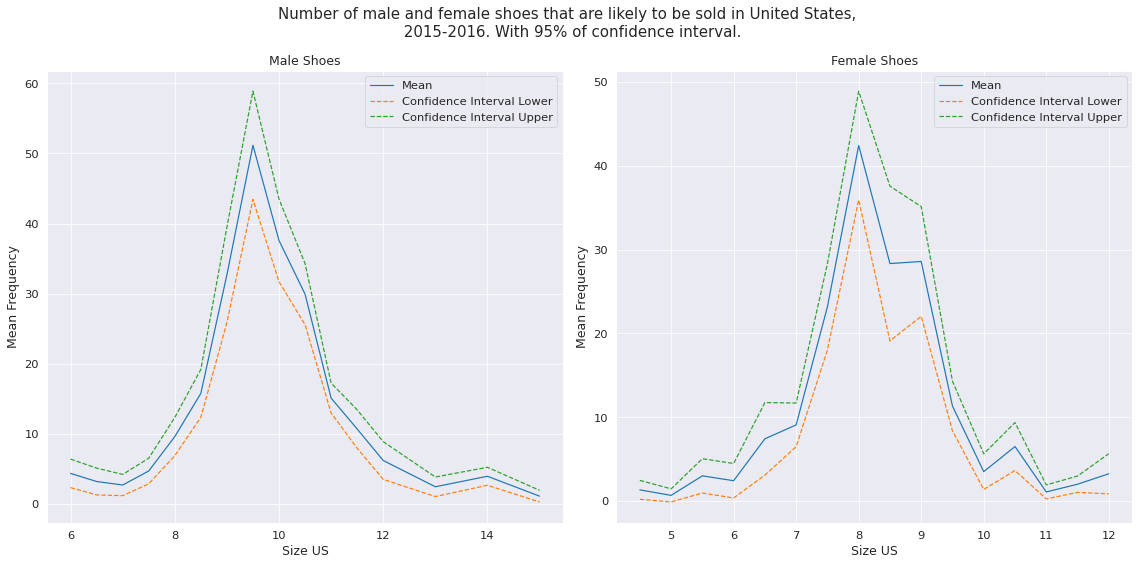

In [10]:
fig, ax = plt.subplots(1,2, figsize = (16,8))

sns.lineplot(data = t_test_male, x = 'Size US', y = 'Mean', ax = ax[0])
sns.lineplot(data = t_test_male, x = 'Size US', y = 'lower_interval', linestyle='--', ax = ax[0])
sns.lineplot(data = t_test_male, x = 'Size US', y = 'higher_interval', linestyle='--', ax = ax[0])

sns.lineplot(data = t_test_female, x = 'Size US', y = 'Mean', ax = ax[1])
sns.lineplot(data = t_test_female, x = 'Size US', y = 'lower_interval', linestyle='--', ax = ax[1])
sns.lineplot(data = t_test_female, x = 'Size US', y = 'higher_interval', linestyle='--', ax = ax[1])

ax[0].legend(labels = ['Mean', 'Confidence Interval Lower', 'Confidence Interval Upper'])
ax[1].legend(labels = ['Mean', 'Confidence Interval Lower', 'Confidence Interval Upper'])

ax[0].set_title('Male Shoes')
ax[1].set_title('Female Shoes')

ax[0].set(ylabel = 'Mean Frequency')
ax[1].set(ylabel = 'Mean Frequency')

fig.suptitle('Number of male and female shoes that are likely to be sold in United States, \n 2015-2016. With 95% of confidence interval.')
fig.tight_layout()

* For Male we have a higher probability to sales shoes with sizes (US) between 9 and 11.
* For Female we have a higher probability to sales shoes with sizes (US) between 7.5 and 9.

* Task 2: Estimate the 90% confidence interval difference between two shops (GER1 and GER2) in Germany with the same period of the last task. What changes can you see?

In [11]:
# In this task we will select two Shops from Germany for the same period of the last task
ger_shop_1_male = df[(df['Country'] == 'Germany') & (df['Shop'] == 'GER1')  & (df.index.year >= 2015) & (df['Gender'] == 'Male')]
ger_shop_2_male = df[(df['Country'] == 'Germany') & (df['Shop'] == 'GER2')  & (df.index.year >= 2015) & (df['Gender'] == 'Male')]

print(ger_shop_1_male.shape)
print(ger_shop_2_male.shape)

(986, 8)
(995, 8)


In [12]:
# Calculate the size male shoes frequency per month (2015-2016) GER1
freq_ger1 = pd.DataFrame(ger_shop_1_male[['Country','Size (US)', 'Month']].groupby('Size (US)').value_counts())
freq_ger1 = freq_ger1.pivot_table(
    index = ['Size (US)'],
    columns = ['Month'],
    values = 0
)

freq_ger1.fillna(0, inplace= True)
freq_ger1

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0,1.0,0.0
6.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
7.5,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
8.0,2.0,2.0,3.0,7.0,1.0,1.0,7.0,3.0,4.0,2.0,6.0,5.0
8.5,8.0,5.0,8.0,9.0,5.0,6.0,8.0,2.0,5.0,2.0,3.0,0.0
9.0,8.0,1.0,5.0,10.0,10.0,15.0,26.0,6.0,20.0,15.0,9.0,19.0
9.5,18.0,18.0,7.0,6.0,22.0,27.0,22.0,15.0,19.0,22.0,12.0,25.0
10.0,8.0,5.0,14.0,9.0,10.0,12.0,15.0,7.0,12.0,15.0,15.0,8.0


In [13]:
# Calculate the size male shoes frequency per month (2015-2016) GER2
freq_ger2 = pd.DataFrame(ger_shop_2_male[['Country','Size (US)', 'Month']].groupby('Size (US)').value_counts())
freq_ger2 = freq_ger2.pivot_table(
    index = ['Size (US)'],
    columns = ['Month'],
    values = 0
)

freq_ger2.fillna(0, inplace= True)
freq_ger2

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
6.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0
6.5,1.0,1.0,1.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,0.0,0.0,0.0
7.5,0.0,1.0,0.0,0.0,1.0,11.0,3.0,2.0,3.0,0.0,1.0,2.0
8.0,6.0,6.0,6.0,4.0,1.0,5.0,0.0,4.0,7.0,6.0,2.0,4.0
8.5,7.0,4.0,1.0,6.0,4.0,8.0,10.0,5.0,3.0,6.0,10.0,3.0
9.0,10.0,6.0,6.0,1.0,10.0,17.0,19.0,11.0,25.0,11.0,8.0,11.0
9.5,24.0,15.0,10.0,13.0,18.0,20.0,15.0,16.0,13.0,17.0,25.0,24.0
10.0,12.0,15.0,8.0,16.0,8.0,15.0,17.0,10.0,6.0,10.0,12.0,13.0


In [14]:
import pingouin as pg

lower = []
upper = []
for i in range(len(freq_ger1)):
    x = freq_ger1.iloc[i]
    y = freq_ger2.iloc[i]
    
    result = pg.ttest(x, y, correction= False, confidence= 0.90)
    lower.append(result['CI90%'][0][0])
    upper.append(result['CI90%'][0][1])
    
t_test_indep_male = pd.DataFrame({'lower': lower, 'upper': upper})
t_test_indep_male['Size (US)'] = freq_ger1.index
t_test_indep_male

,lower,upper,Size (US)
0,-1.221733,0.888400,6.0
1,-1.544381,0.044381,6.5
2,-0.973833,0.640500,7.0
3,-2.546493,0.713159,7.5
4,-2.213878,0.880545,8.0
5,-2.493088,1.493088,8.5
6,-4.028575,5.528575,9.0
7,-3.835571,4.335571,9.5
8,-3.452816,1.452816,10.0
9,-2.121346,6.954679,10.5


In [15]:
# In this task we will select two Shops from Germany for the same period of the last task
ger_shop_1_female = df[(df['Country'] == 'Germany') & (df['Shop'] == 'GER1')  & (df.index.year >= 2015) & (df['Gender'] == 'Female')]
ger_shop_2_female = df[(df['Country'] == 'Germany') & (df['Shop'] == 'GER2')  & (df.index.year >= 2015) & (df['Gender'] == 'Female')]

print(ger_shop_1_female.shape)
print(ger_shop_2_female.shape)

(609, 8)
(627, 8)


In [16]:
# Calculate the size female shoes frequency per month (2015-2016) GER1
freq_ger1 = pd.DataFrame(ger_shop_1_female[['Country','Size (US)', 'Month']].groupby('Size (US)').value_counts())
freq_ger1 = freq_ger1.pivot_table(
    index = ['Size (US)'],
    columns = ['Month'],
    values = 0
)

freq_ger1.fillna(0, inplace= True)
freq_ger1

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
4.5,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
5.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.5,5.0,3.0,2.0,2.0,2.0,0.0,2.0,0.0,4.0,5.0,5.0,6.0
7.0,0.0,3.0,6.0,5.0,1.0,2.0,2.0,0.0,3.0,0.0,0.0,1.0
7.5,4.0,2.0,4.0,2.0,2.0,9.0,9.0,9.0,9.0,13.0,6.0,6.0
8.0,10.0,13.0,8.0,12.0,5.0,4.0,14.0,9.0,6.0,25.0,10.0,15.0
8.5,12.0,13.0,13.0,11.0,17.0,11.0,9.0,13.0,6.0,11.0,14.0,15.0


In [17]:
# Calculate the size female shoes frequency per month (2015-2016) GER2
freq_ger2 = pd.DataFrame(ger_shop_2_female[['Country','Size (US)', 'Month']].groupby('Size (US)').value_counts())
freq_ger2 = freq_ger2.pivot_table(
    index = ['Size (US)'],
    columns = ['Month'],
    values = 0
)

freq_ger2.fillna(0, inplace= True)
freq_ger2

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (US),,,,,,,,,,,,
4.5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0
6.0,0.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6.5,3.0,0.0,2.0,1.0,2.0,2.0,0.0,1.0,7.0,6.0,5.0,3.0
7.0,0.0,1.0,1.0,5.0,3.0,6.0,2.0,4.0,1.0,4.0,2.0,9.0
7.5,4.0,4.0,7.0,3.0,5.0,9.0,13.0,11.0,17.0,12.0,12.0,6.0
8.0,17.0,10.0,10.0,17.0,8.0,10.0,14.0,11.0,8.0,16.0,12.0,8.0
8.5,10.0,8.0,13.0,5.0,9.0,13.0,12.0,8.0,5.0,12.0,16.0,13.0


In [18]:
import pingouin as pg

lower = []
upper = []
for i in range(len(freq_ger1)):
    x = freq_ger1.iloc[i]
    y = freq_ger2.iloc[i]
    
    result = pg.ttest(x, y, correction= False, confidence= 0.90)
    lower.append(result['CI90%'][0][0])
    upper.append(result['CI90%'][0][1])
    
t_test_indep_female = pd.DataFrame({'lower': lower, 'upper': upper})
t_test_indep_female['Size (US)'] = freq_ger1.index
t_test_indep_female

,lower,upper,Size (US)
0,-0.294036,0.794036,4.5
1,-0.236218,0.736218,5.0
2,-0.833653,0.333653,5.5
3,-1.066710,0.233376,6.0
4,-1.166223,1.832889,6.5
5,-2.877540,0.377540,7.0
6,-5.150003,0.483337,7.5
7,-4.111776,2.445109,8.0
8,-0.454614,3.954614,8.5
9,-2.193186,2.193186,9.0


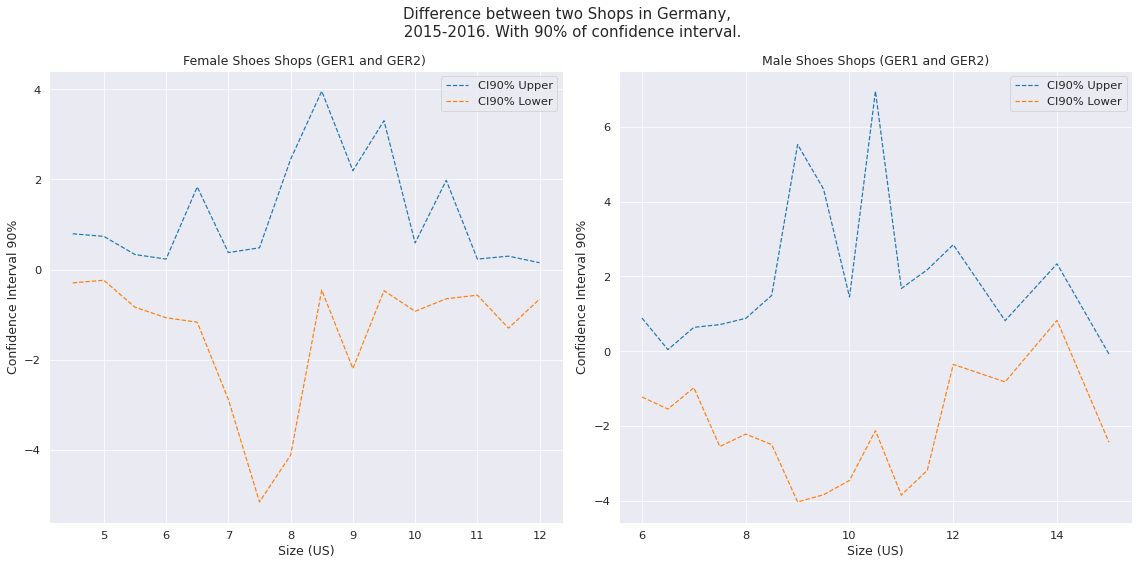

In [27]:
fig, ax = plt.subplots(1,2, figsize = (16,8))

sns.lineplot(data = t_test_indep_female, x = 'Size (US)', y = 'upper', linestyle='--', ax = ax[0])
sns.lineplot(data = t_test_indep_female, x = 'Size (US)', y = 'lower', linestyle='--', ax = ax[0])

sns.lineplot(data = t_test_indep_male, x = 'Size (US)', y = 'upper', linestyle='--', ax = ax[1])
sns.lineplot(data = t_test_indep_male, x = 'Size (US)', y = 'lower', linestyle='--', ax = ax[1])

ax[0].legend(labels = ['CI90% Upper', 'CI90% Lower'])
ax[1].legend(labels = ['CI90% Upper', 'CI90% Lower'])

ax[0].set(ylabel = 'Confidence Interval 90%')
ax[1].set(ylabel = 'Confidence Interval 90%')

ax[0].set_title('Female Shoes Shops (GER1 and GER2) ')
ax[1].set_title('Male Shoes Shops (GER1 and GER2)')

fig.suptitle('Difference between two Shops in Germany, \n 2015-2016. With 90% of confidence interval.')
fig.tight_layout()

* In general, we can conclude that there is no statistically significant difference in frequency of shoes sales between this two Shops, because the 90% confidence interval includes the null value, zero.
* Since most of the intervals contains zero (no difference), we do not have sufficient evidence to conclude that there is a difference.
* Except for the case of the size 14 (US) for the male Shops, that we have a little difference between the frequency os sales.  In this case we can conclude that have a more sales of this size in GER1 Shop compared to GER2 Shop.